In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import joypy
import calplot
import statsmodels.api as sm
from pylab import rcParams
sns.set()

In [2]:
#Загрузка объема стока
data = pd.read_csv('C:\VOLGA.csv', sep=';')
dataset = pd.DataFrame

In [193]:
#Форматирование объема стока
dataset = data.drop('Total', axis=1)
dataset.replace(0, np.nan, inplace=True)
dataset.interpolate(inplace=True)
#dataset['Total'] = dataset[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].sum(axis=1)
#Создание нового датасета стока путем года и месяца
dat1 = pd.DataFrame
dat1 = dataset.set_index(dataset.pop('Year').astype(str)).stack().reset_index(name='Volume')
dat1['Year'] = dat1.pop('level_1')+ '-' + dat1['Year']
dat1.set_index(['Year'], inplace=True)

In [17]:
#Загрузка подготовленного датасета с обемами осадков в бассейне Волги
concated=pd.read_csv('c:/concated.csv')
concated['Date']  = pd.to_datetime(concated.Date, errors='coerce', format='%Y-%m-%d')
#concated.index = concated.Date
#concated.drop('Date', axis=1, inplace=True)

astrahan = concated.loc[concated['StName'] == 'Astrahan']
volgograd = concated.loc[concated['StName'] == 'Volgograd']
vologda = concated.loc[concated['StName'] == 'Vologda']
ryazan = concated.loc[concated['StName'] == 'Ryazan']
nizhnii = concated.loc[concated['StName'] == 'Nizhnii Novgorod']
rybinsk = concated.loc[concated['StName'] == 'Rybinsk']
moskva = concated.loc[concated['StName'] == 'Moskva']
izhevsk = concated.loc[concated['StName'] == 'Izhevsk']
ekaterinburg = concated.loc[concated['StName'] == 'Ekaterinburg']
perm = concated.loc[concated['StName'] == 'Perm']
kirov = concated.loc[concated['StName'] == 'Kirov']
kazan = concated.loc[concated['StName'] == 'Kazan']
ufa = concated.loc[concated['StName'] == 'Ufa']
penza = concated.loc[concated['StName'] == 'Penza']
samara = concated.loc[concated['StName'] == 'Samara']
saratov = concated.loc[concated['StName'] == 'Saratov']
krasnoufimsk = concated.loc[concated['StName'] == 'Krasnoufimsk']
kostroma = concated.loc[concated['StName'] == 'Kostroma']

In [9]:
#Объединение данных по месяцам
s = kostroma.resample('M', on='Date')['Rainfall'].sum()
df1=pd.DataFrame(s)
#df1.reset_index(inplace=True)

In [205]:
#concated = pd.DataFrame(astrahan.loc['1895-01-01':'2019-12-31'])
concated = pd.DataFrame(astrahan.loc['1938-01-01':'2019-12-31'])

In [136]:
cols = ['Date','Tmean','Rainfall', 'StName', 'lat', 'lon', 'year']
concated[cols] = concated[cols].replace({ 0.0: np.nan})
concated.dropna(inplace=True)

In [69]:
#astrahan.reset_index(inplace=True)
#year = pd.DataFrame(astrahan['Date'].dt.to_period('Y'))
#astrahan['year'] = year['Date']
#astrahan.drop('index', axis=1,inplace=True)
#astrahan.index = astrahan['Date']

In [206]:
s = concated.resample('Y', on='Date')['Rainfall'].sum()

In [207]:
t = concated.resample('Y', on='Date')['Tmean'].mean()

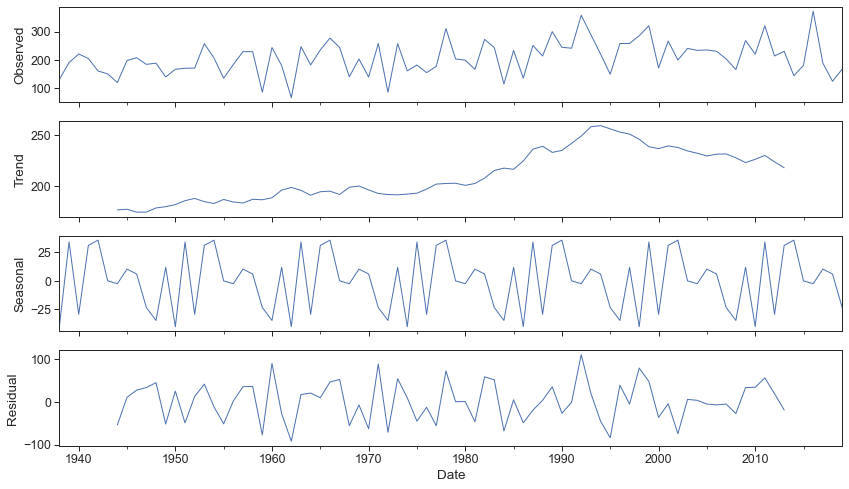

In [208]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(s, model='additive', freq=1*12)
result.plot()
plt.show()

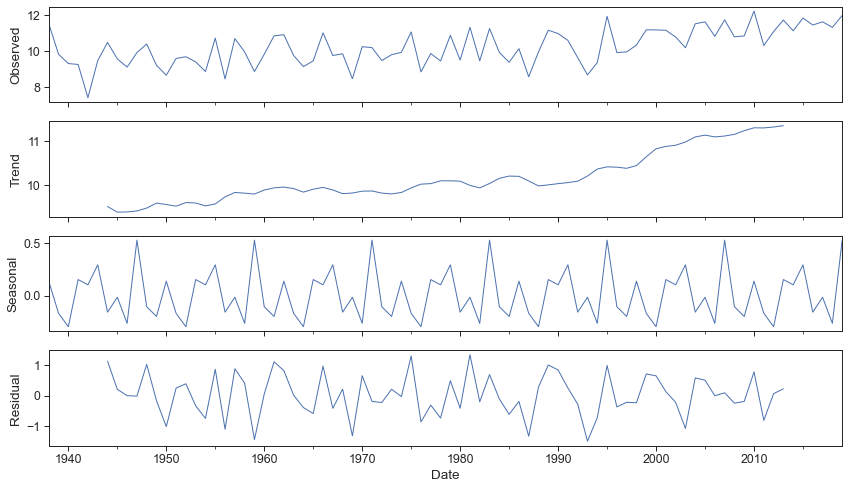

In [209]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(t, model='additive', freq=1*12)
result.plot()
plt.show()

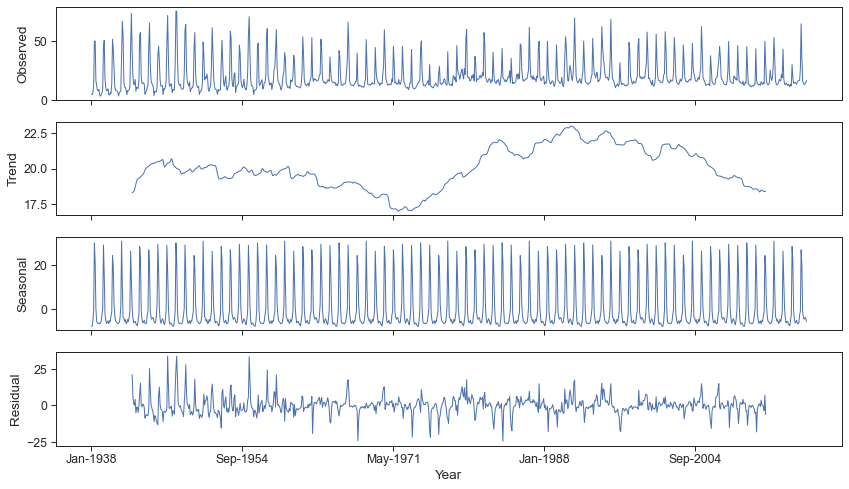

In [211]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(dat1, model='additive', freq=9*12)
result.plot()
plt.show()

In [203]:
dat1['date'] = t

Volume
Year            
Jan-1938    4.71
Feb-1938    4.40
Mar-1938    5.79
Apr-1938   11.85
May-1938   49.28
...          ...
Aug-2016   13.95
Sep-2016   12.78
Oct-2016   13.26
Nov-2016   14.23
Dec-2016   16.47

[948 rows x 1 columns]

In [204]:
t

Date
1932-12-31     9.281421
1933-12-31    10.469041
1934-12-31     9.505479
1935-12-31    11.370959
1936-12-31     9.869945
                ...    
2015-12-31    11.841918
2016-12-31    11.453279
2017-12-31    11.630137
2018-12-31    11.325479
2019-12-31    11.983562
Freq: A-DEC, Name: Tmean, Length: 88, dtype: float64

Text(0.5, 1.0, 'relationship between ')

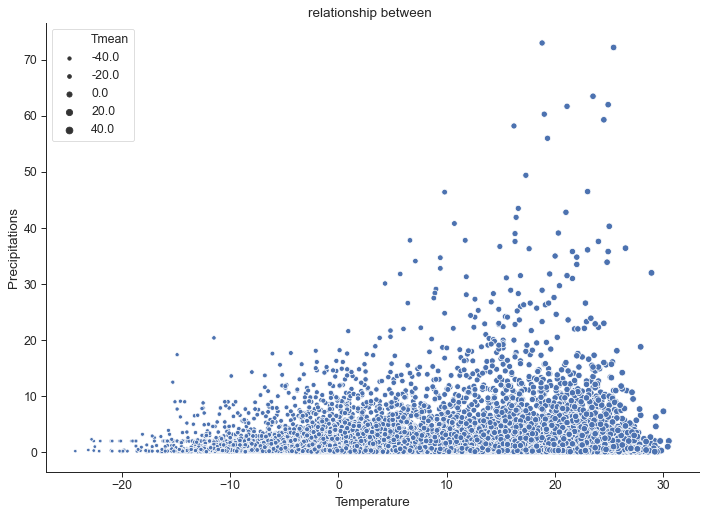

In [141]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style='ticks', context='paper',font_scale=1.4, rc={"lines.linewidth": 1})
#plt.style.use('dark_background')

ax = sns.scatterplot(x="Tmean", y="Rainfall",
                size="Tmean",
                palette="YlOrBr",
                data=concated)
sns.despine()
ax.set(xlabel='Temperature', ylabel='Precipitations')
plt.title("relationship between ")

In [351]:
#Изменение датафрейма осадков под размер датафрейма стока 
df2=pd.DataFrame(df1.loc['1938-01-31' : '2016-12-31', 'Tmean'])
df2.reset_index(inplace=True)

In [447]:
temperature.to_csv('temperature.csv', encoding = 'utf-8')

In [355]:
#Creation a nan for some cities in missed dates
syndate = pd.DataFrame(pd.date_range('1938-01-01', periods=240, freq=pd.DateOffset(months=1, day=1)))
syndate['Tmean'] = np.nan
syndate.columns = ['Date', 'Tmean']
#syndate
# Merge datasets
frames = [syndate, df2]
result = pd.concat(frames)
result.reset_index(inplace=True)


In [14]:
#Year ammount of precipitation
presp = pd.DataFrame(dataset.resample('M', on='Date')['Astrakhan','Volgograd','Vologda','Ryazan','Nizhnii','Ekaterinburg',
                                                     'Perm','Kirov','Kirov','Kazan','Ufa','Penza','Saratov',
                                                     'Krasnoufimsk','Kostroma','Moskva','Rybinsk','Izhevsk'].sum())


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [378]:
#Year group by mean temp
temp = pd.DataFrame(temperature.resample('Y', on='Date')['Astrakhan','Volgograd','Saratov','Moskva','Penza','Ryazan','Nizhnii','Kostroma','Rybinsk','Kazan','Ufa','Vologda','Ekaterinburg',
                                                     'Perm','Kirov','Kirov',
                                                     'Krasnoufimsk','Izhevsk'].mean())

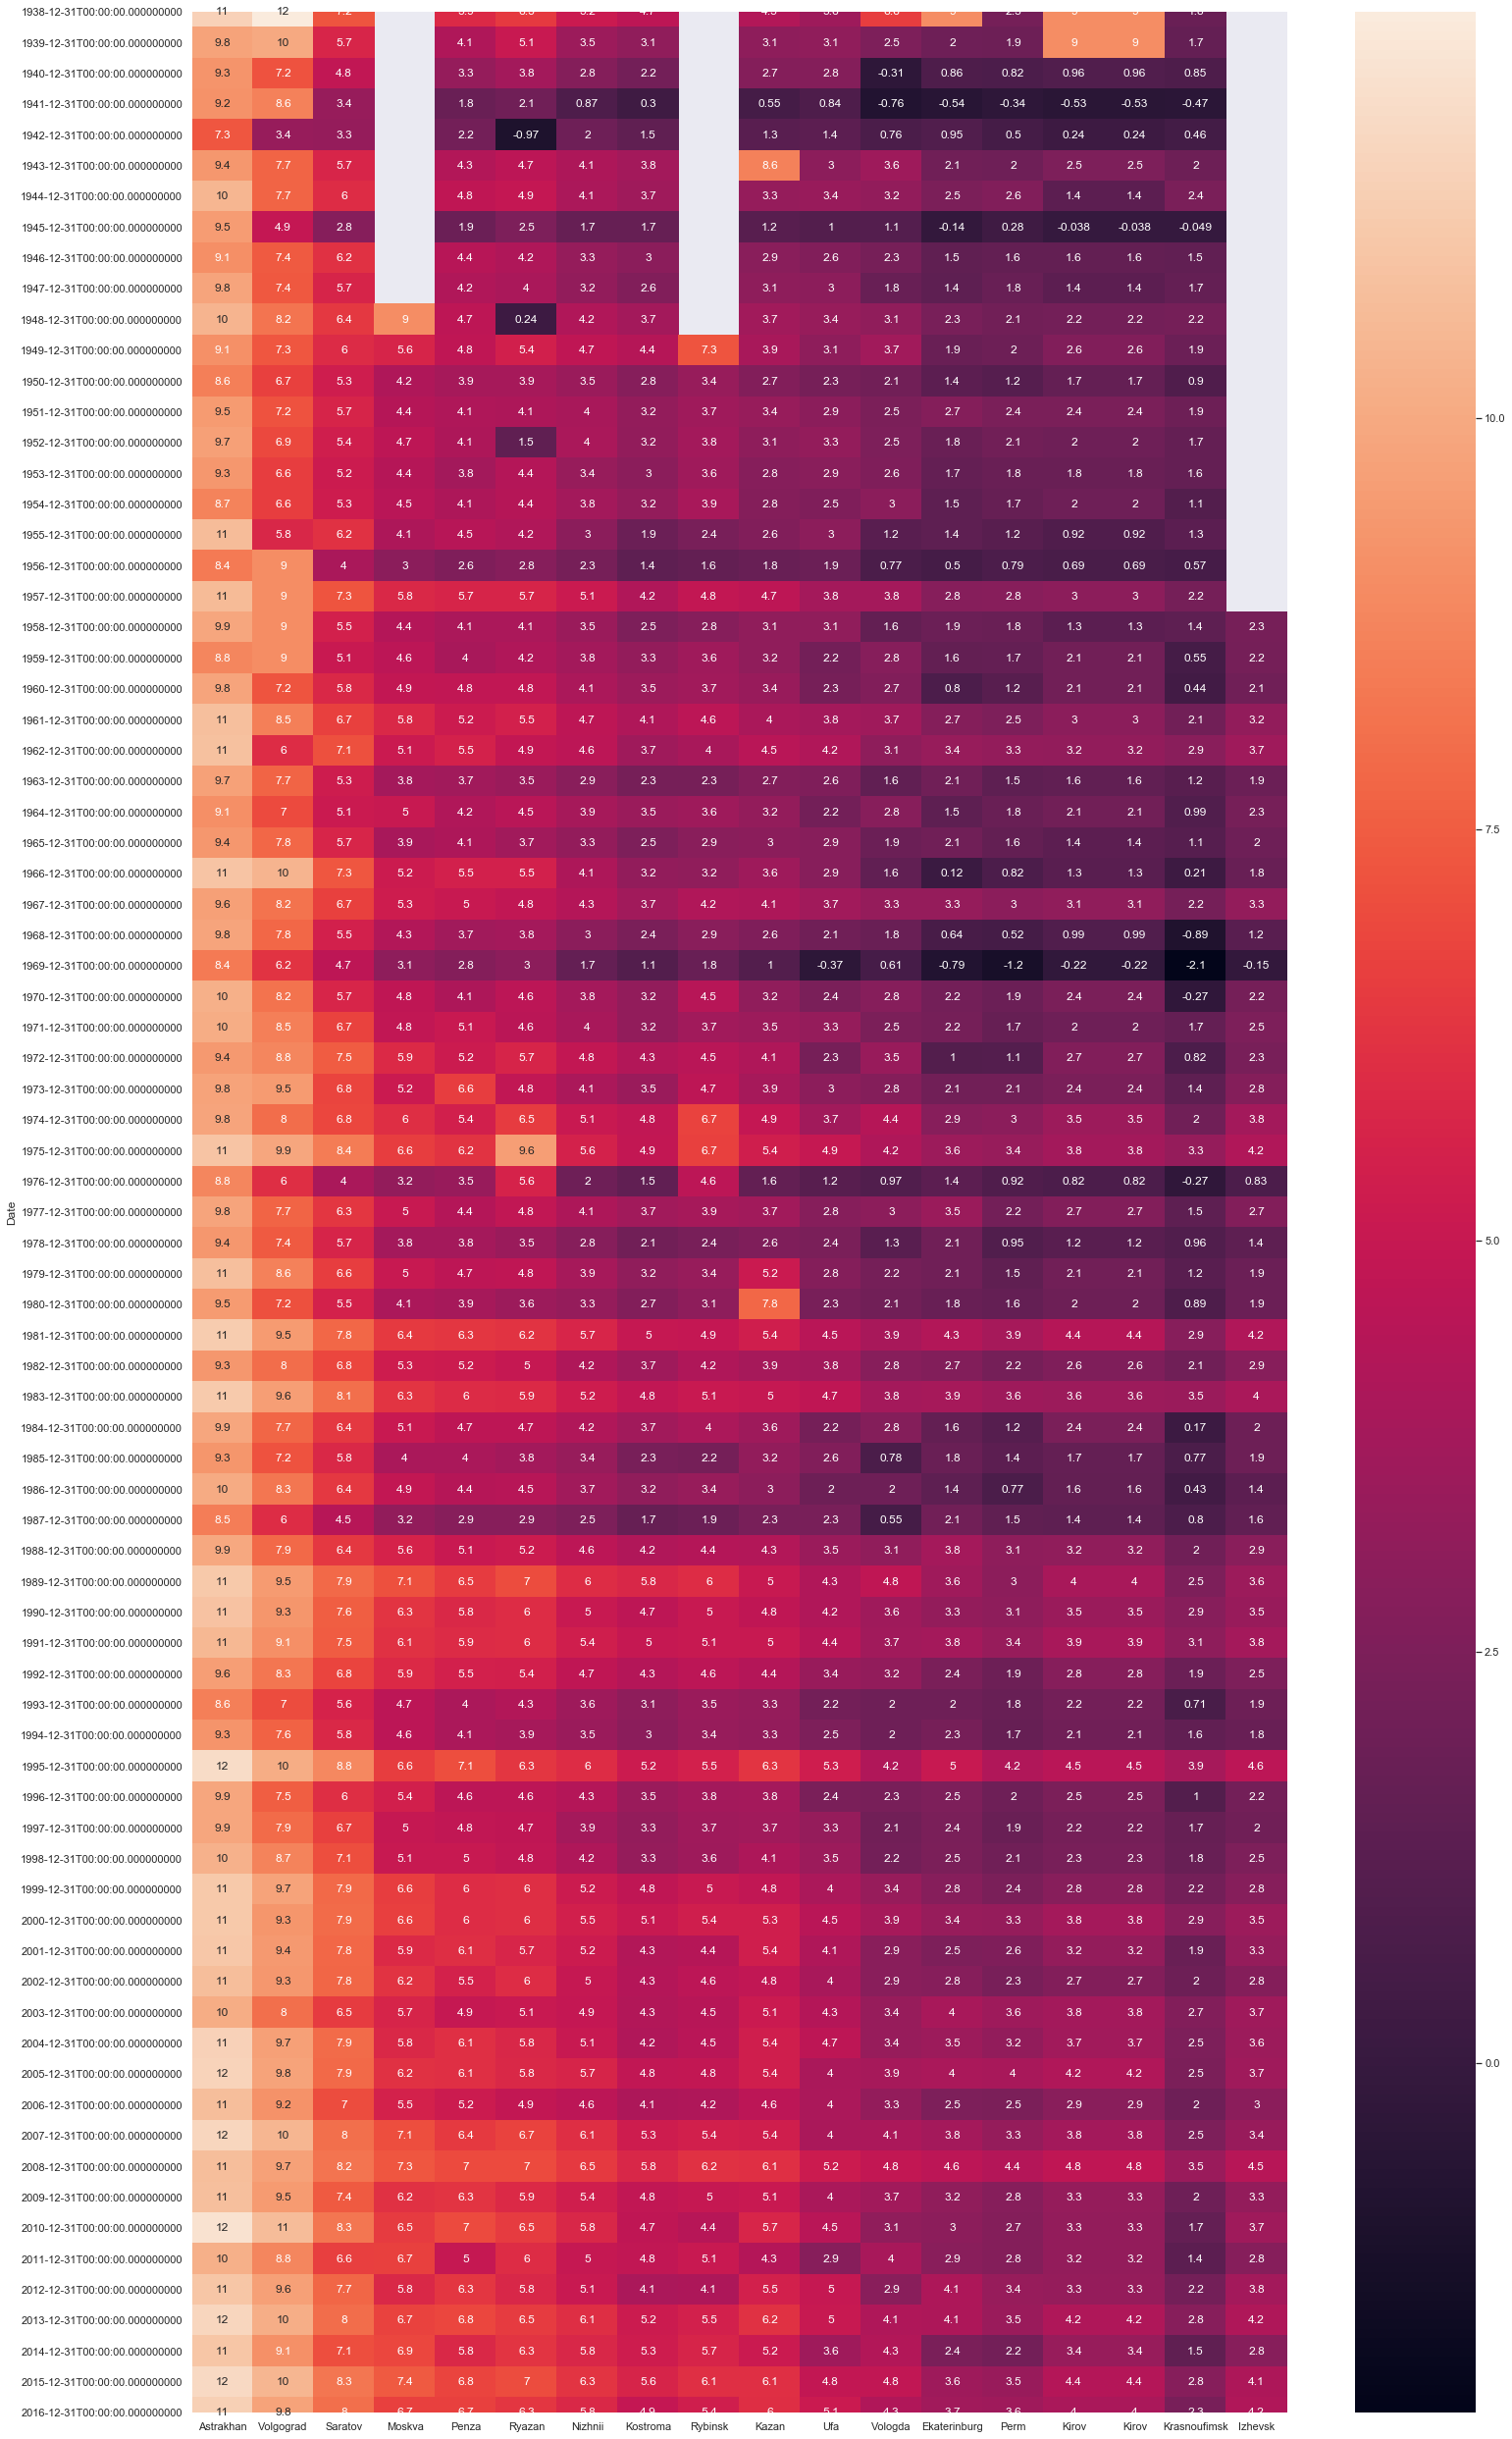

In [379]:
plt.figure(figsize=(25,45))
sns.heatmap(temp, annot=True)

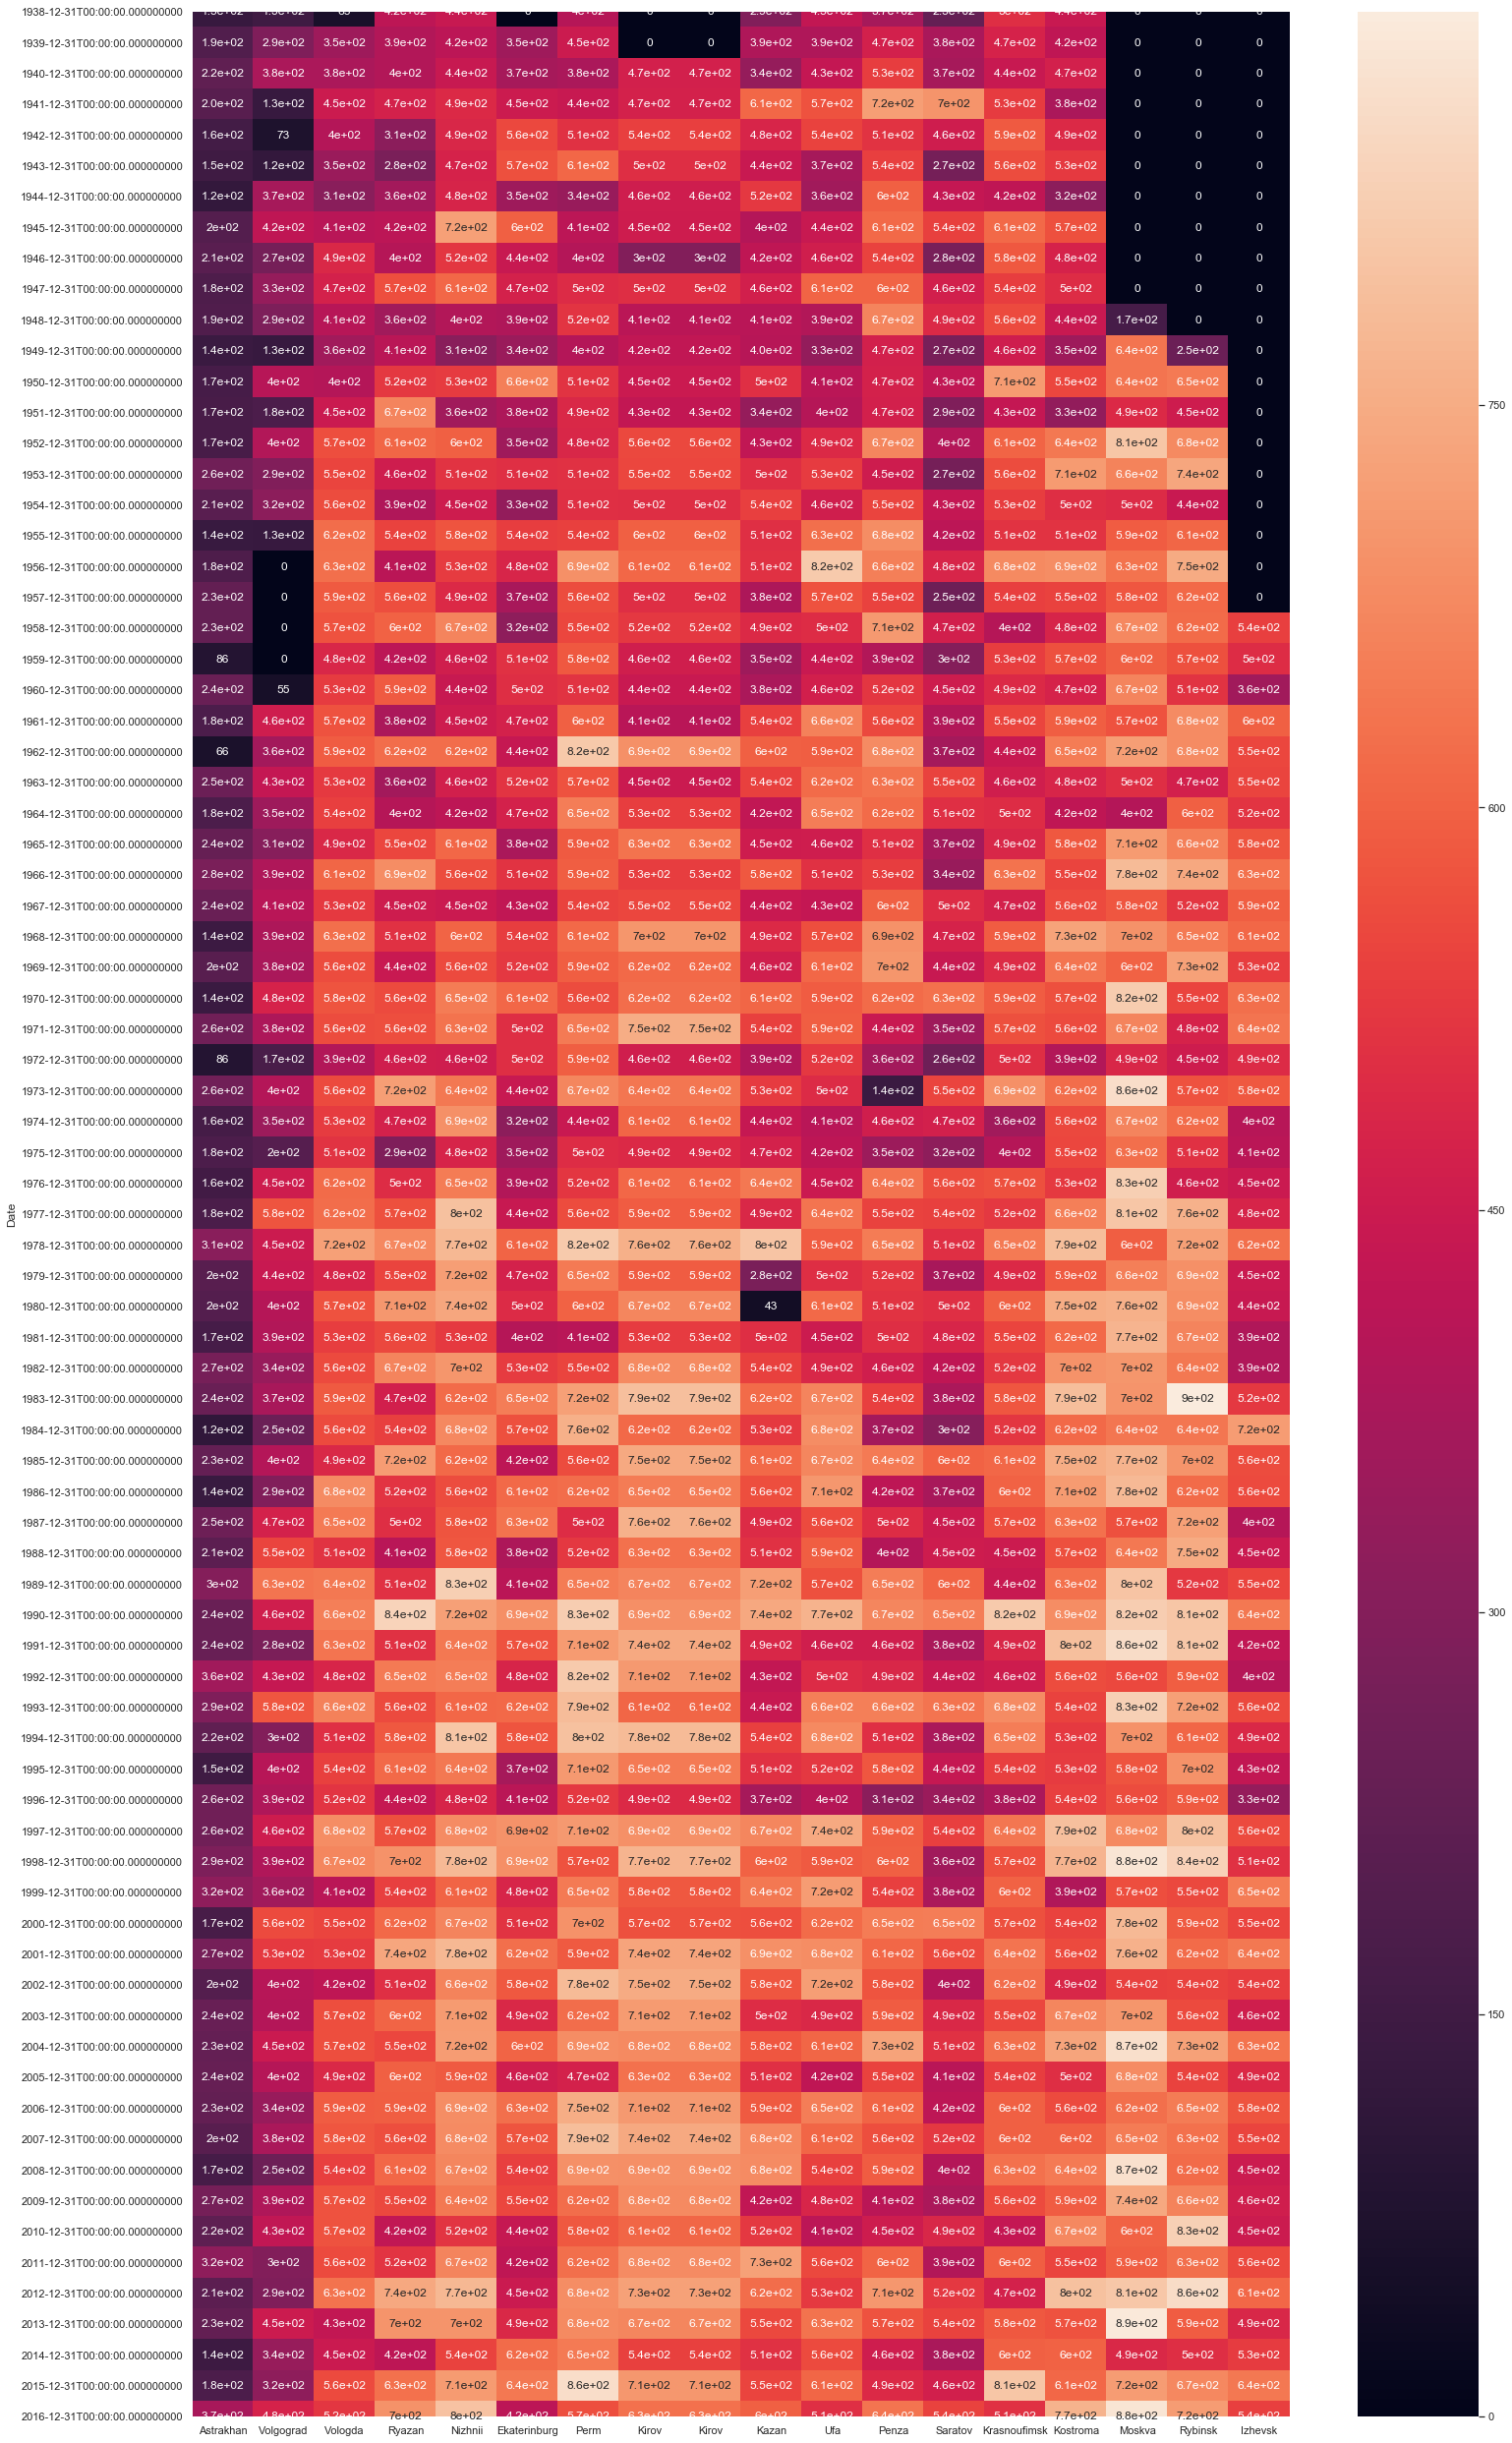

In [372]:
plt.figure(figsize=(25,45))
sns.heatmap(presp, annot=True)

In [70]:
dataset = pd.read_csv('corrtable.csv')

In [71]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [72]:
dataset = dataset[dataset['Date'].dt.month==4]

In [91]:
dataset

Astrakhan  Volgograd  Vologda  Ryazan  Nizhnii  Ekaterinburg  \
Date                                                                       
1938-04-01       22.1        0.0      0.0    51.9     74.0           0.0   
1939-04-01        7.7       11.4     29.4    70.0     52.9          25.3   
1940-04-01        1.9       20.3      6.4    23.9     42.9          27.9   
1941-04-01        0.1       22.0     22.6    61.9     64.0          38.2   
1942-04-01        4.9       47.1      1.1    25.7     37.4          14.8   
...               ...        ...      ...     ...      ...           ...   
2012-04-01        0.1        7.3     48.7    76.2     75.8          46.4   
2013-04-01        2.9       23.5     35.5    42.8     21.8          53.8   
2014-04-01       12.0       20.0      6.9    17.6     12.8          52.1   
2015-04-01       35.9       34.9     19.2    61.9     67.0          38.4   
2016-04-01       10.4       22.9     25.6    40.1    110.9          61.8   

            Perm  Kirov  Kazan    Ufa  Penza  Samara  Saratov  Krasnoufimsk  \
Date                                                                          
1938-04-01  44.0    0.0   19.3   16.8   71.0    32.7     37.2          43.9   
1939-04-01  42.5    0.0   56.4   29.7   44.2    46.7     28.3          47.1   
1940-04-01  40.0   35.5   40.2   21.5   51.5    23.6     36.7          40.6   
1941-04-01  18.5   12.1   83.2  102.1   56.3    67.0     14.5          63.8   
1942-04-01  13.2    9.5    7.1    4.2   27.8    12.2     15.4          15.1   
...          ...    ...    ...    ...    ...     ...      ...           ...   
2012-04-01  46.1   50.8   41.6   30.6   77.6    24.6     17.0          57.4   
2013-04-01  49.1   25.3   21.9   56.7   31.8    45.0     30.8          39.3   
2014-04-01  42.3   30.0   24.4   26.0   22.7    38.4     34.7          26.5   
2015-04-01  41.3   54.8   59.8   48.1   19.2    70.7     39.0          39.5   
2016-04-01  74.6   33.6   47.2   45.3   48.5    39.9     45.2          60.8   

            Kostroma  Moskva  Rybinsk  Izhevsk  
Date                                            
1938-04-01      54.7     NaN      NaN      NaN  
1939-04-01      44.2     NaN      NaN      NaN  
1940-04-01      17.2     NaN      NaN      NaN  
1941-04-01      29.2     NaN      NaN      NaN  
1942-04-01      12.7     NaN      NaN      NaN  
...              ...     ...      ...      ...  
2012-04-01      85.7    49.5     61.9     37.8  
2013-04-01      25.0    63.6     27.3     49.8  
2014-04-01      21.9    22.4     14.2     38.7  
2015-04-01      51.1    44.0     33.0     45.0  
2016-04-01      34.8    33.7     32.1     53.6  

[79 rows x 18 columns]

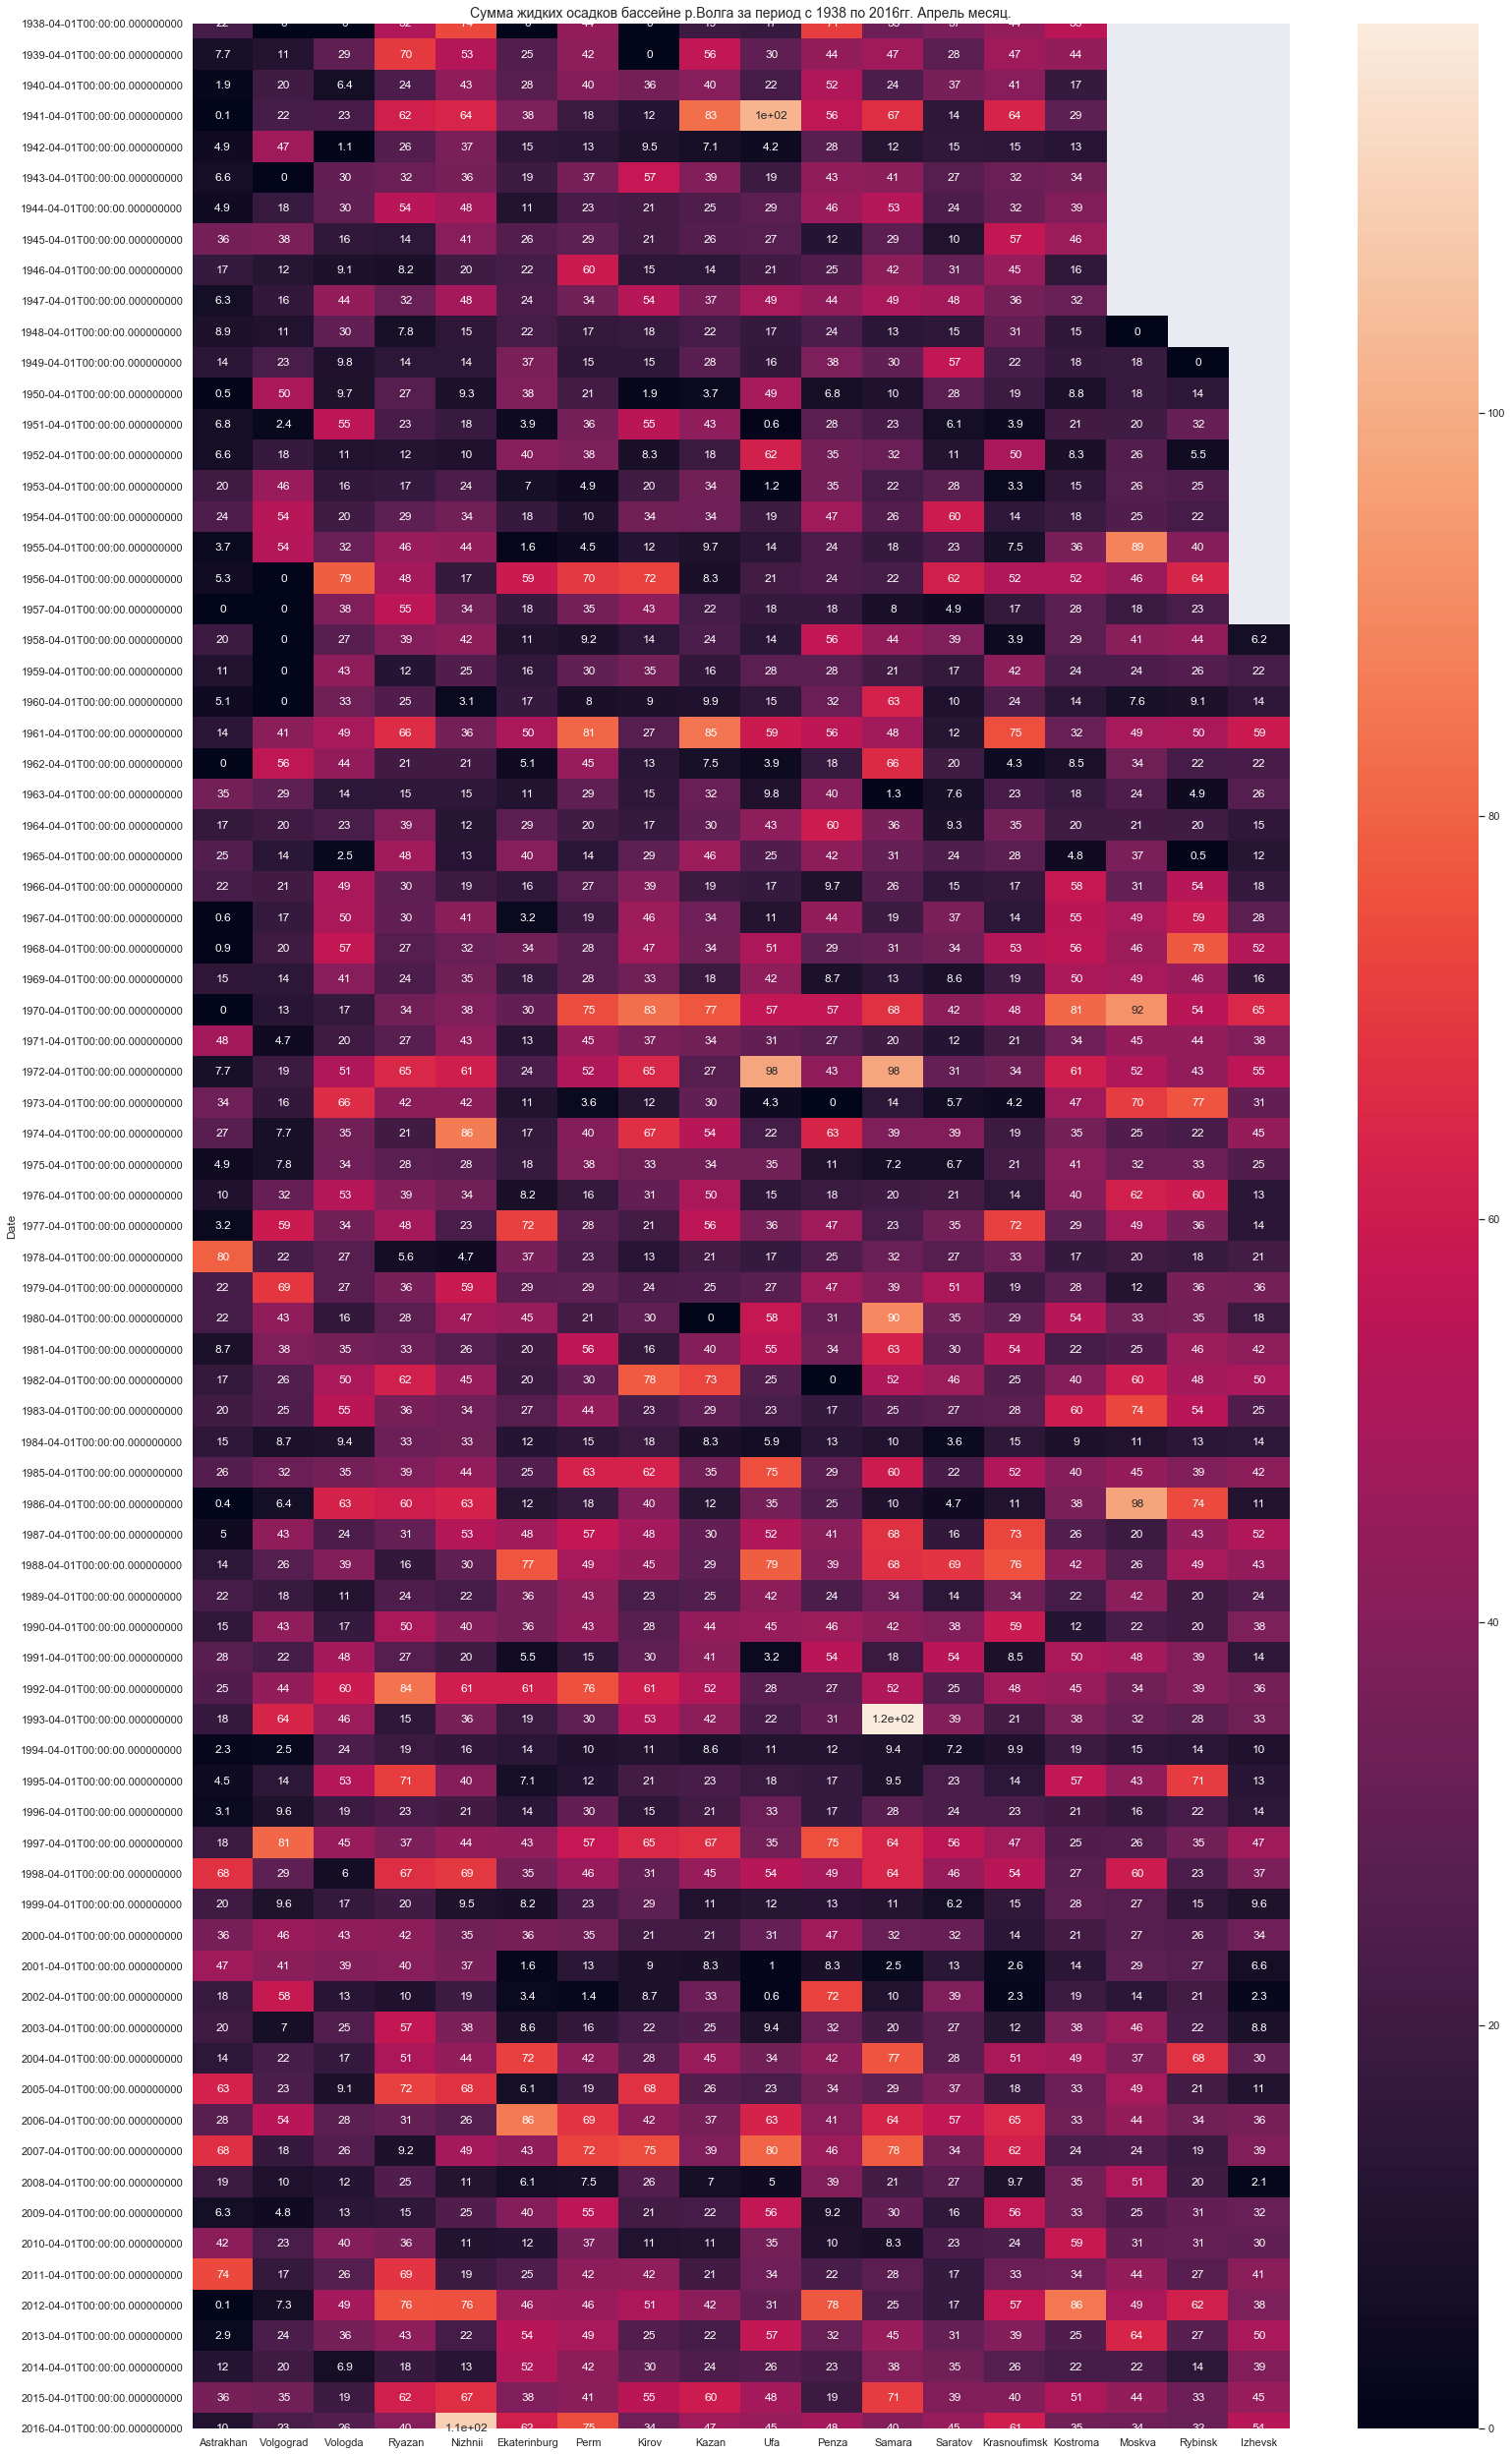

In [90]:
plt.figure(figsize=(25,45))
plt.title('Сумма жидких осадков бассейне р.Волга за период с 1938 по 2016гг. Апрель месяц.', fontsize=14)
sns.heatmap(dataset, annot=True)
plt.savefig('precipitation_april.png', dpi=300, bbox_inches='tight')

In [473]:
#Срез для графика корреляций 
sliced = pd.DataFrame(dataset.loc['1995-04-01':'1995-07-01'])

In [437]:
dataset.to_csv('corrtable.csv', encoding = 'utf-8')

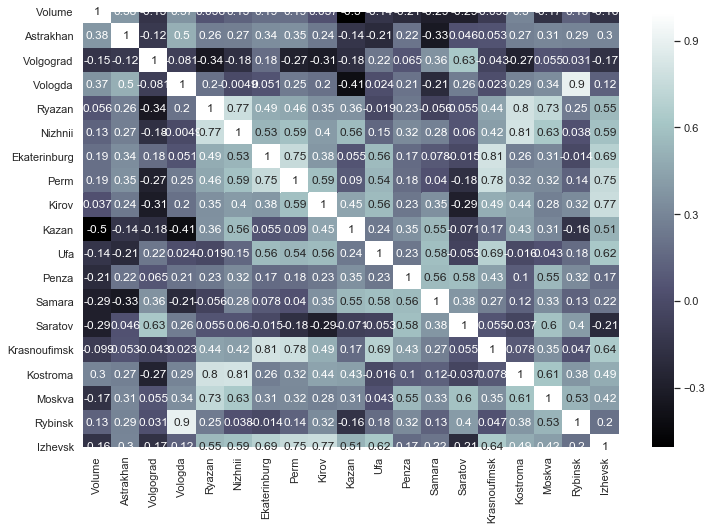

In [386]:
plt.figure(figsize=(12,8))
sns.heatmap(sliced.corr(),annot=True, cmap='bone')

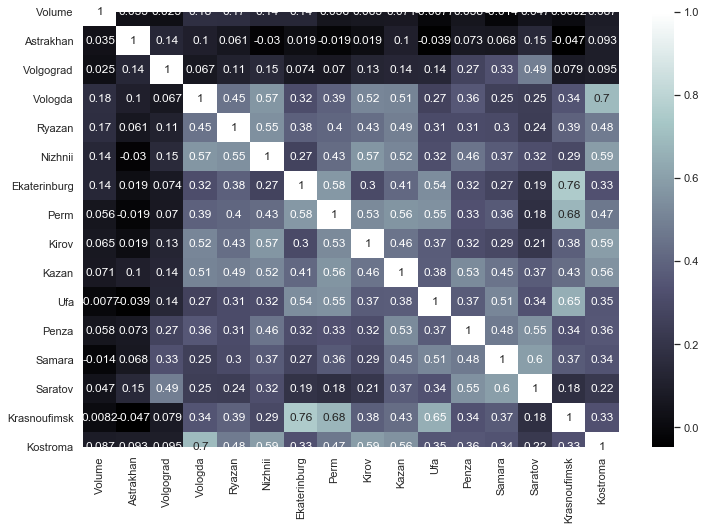

In [181]:
plt.figure(figsize=(12,8))
sns.heatmap(sliced.corr(),annot=True, cmap='bone')

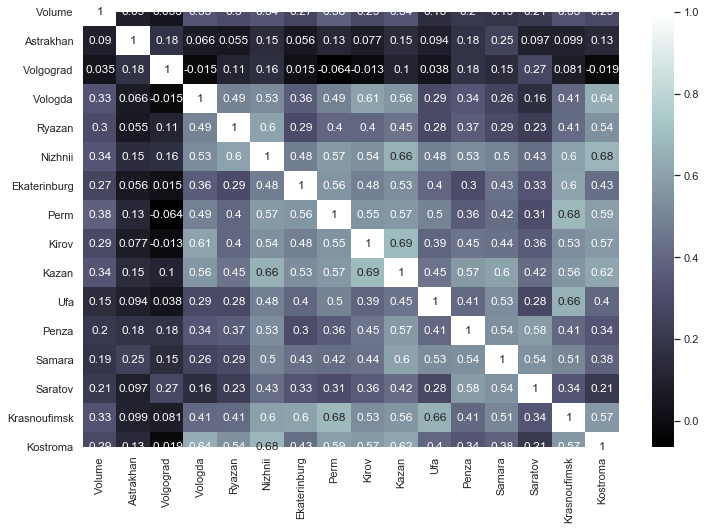

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(sliced.corr(),annot=True, cmap='bone')

In [464]:
slicedtem = pd.DataFrame(temperature.loc['1994-11-01':'1995-02-01'])

In [468]:
slicedtem.drop('Astrakhan', axis=1, inplace=True)


Vologda     Ryazan   Nizhnii   Rybinsk    Moskva    Izhevsk  \
Date                                                                       
1994-11-01 -6.890000  -2.640000 -4.076667 -4.570000 -2.526667  -6.243333   
1994-12-01 -8.929032 -10.212903 -8.945161 -8.141935 -7.948387 -11.767742   
1995-01-01 -8.164516  -6.632258 -7.438710 -7.412903 -5.874194 -12.432258   
1995-02-01 -2.721429  -2.075000 -2.617857 -1.675000 -0.846429  -5.257143   

            Ekaterinburg       Perm      Kirov      Kazan        Ufa  \
Date                                                                   
1994-11-01     -7.126667  -7.440000  -6.763333  -3.910000  -4.823333   
1994-12-01    -13.938710 -12.374194 -10.470968  -9.574194 -12.238710   
1995-01-01    -10.432258 -11.432258 -10.016129 -10.312903 -14.274194   
1995-02-01     -4.482143  -5.164286  -3.978571  -3.985714  -5.678571   

                Penza     Samara   Saratov  Krasnoufimsk  Kostroma  
Date                                                                
1994-11-01  -2.460000  -2.083333 -0.426667     -6.540000 -5.180000  
1994-12-01 -10.696774  -9.480645 -8.216129    -13.516129 -8.993548  
1995-01-01  -8.867742 -10.596774 -8.183871    -15.570968 -8.012903  
1995-02-01  -3.292857  -4.178571 -2.317857     -5.610714 -2.503571

In [482]:
sliced

Date  Volume  Astrakhan  Volgograd  Vologda  Ryazan  Nizhnii  \
0 1995-04-01   32.92        4.5       14.1     52.7    71.3     39.8   
1 1995-05-01   68.03       20.6       35.3     61.8    29.1     56.5   
2 1995-06-01   33.44       19.1       23.5     52.3   104.7     81.1   
3 1995-07-01   17.84       11.1       15.6     28.5    91.7     78.2   

   Ekaterinburg   Perm  Kirov  Kazan   Ufa  Penza  Samara  Saratov  \
0           7.1   12.1   21.1   22.8  18.3   16.9     9.5     23.3   
1          39.9   76.1   65.2    6.5  43.2   29.9    30.8     10.4   
2          74.7  120.8   45.0   15.8  38.6   59.6     8.5     46.6   
3          40.6   58.6  105.5   96.1  49.8   62.3    62.6     17.6   

   Krasnoufimsk  Kostroma  Moskva  Rybinsk  Izhevsk  
0          14.0      56.7    43.2     70.6     12.8  
1          26.0      53.2    25.1     61.0     31.3  
2          95.9      48.1    72.1     49.8     45.9  
3          59.2      65.2    54.2     48.2     58.0

In [495]:
slicedtem

Vologda     Ryazan   Nizhnii   Rybinsk    Moskva    Izhevsk  \
Date                                                                       
1994-11-01 -6.890000  -2.640000 -4.076667 -4.570000 -2.526667  -6.243333   
1994-12-01 -8.929032 -10.212903 -8.945161 -8.141935 -7.948387 -11.767742   
1995-01-01 -8.164516  -6.632258 -7.438710 -7.412903 -5.874194 -12.432258   
1995-02-01 -2.721429  -2.075000 -2.617857 -1.675000 -0.846429  -5.257143   

            Ekaterinburg       Perm      Kirov      Kazan        Ufa  \
Date                                                                   
1994-11-01     -7.126667  -7.440000  -6.763333  -3.910000  -4.823333   
1994-12-01    -13.938710 -12.374194 -10.470968  -9.574194 -12.238710   
1995-01-01    -10.432258 -11.432258 -10.016129 -10.312903 -14.274194   
1995-02-01     -4.482143  -5.164286  -3.978571  -3.985714  -5.678571   

                Penza     Samara   Saratov  Krasnoufimsk  Kostroma  Volume  
Date                                                                        
1994-11-01  -2.460000  -2.083333 -0.426667     -6.540000 -5.180000   32.92  
1994-12-01 -10.696774  -9.480645 -8.216129    -13.516129 -8.993548   68.03  
1995-01-01  -8.867742 -10.596774 -8.183871    -15.570968 -8.012903   33.44  
1995-02-01  -3.292857  -4.178571 -2.317857     -5.610714 -2.503571   17.84

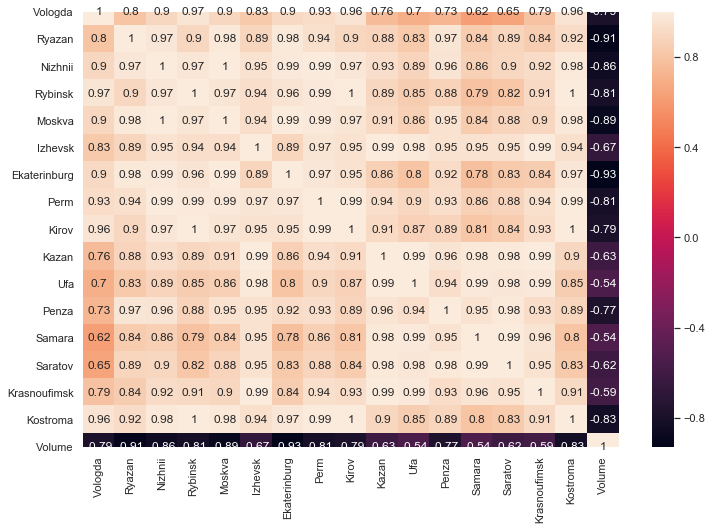

In [496]:
plt.figure(figsize=(12,8))
sns.heatmap(slicedtem.corr(),annot=True)